In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

$$\frac{df}{dx} = f^{-1}(x)$$

In [2]:
def diff_equation(fun, var):
    return sm.diff(fun, var, 2).subs(var, fun) - var


def build_formal_polynomial_expansion(var, n_coeffs):
    coeffs = sm.symbols(",".join([f"a{k}" for k in range(n_coeffs)]))
    return sum([coeffs[k] * var ** k  for k in range(0, n_coeffs)])


def get_power_series_solutions(ode, n_coeffs):
    x = sm.Symbol("x")
    f = build_formal_polynomial_expansion(x, n_coeffs)
    g = ode(f, x).series(x, 0, n_coeffs).removeO()
    print(g)
    eqs = [g.subs(x, 0)] + [sm.diff(g, x, k).subs(x, 0) for k in range(1, n_coeffs)]
    sols = sm.solve(eqs)
    if isinstance(sols, list):
        return x, [f.subs(sol) for sol in sols], [ode(f.subs(sol), x).expand().collect(x) for sol in sols]
    else:
        return x, [f.subs(sols)], [ode(f.subs(sols), x).expand().collect(x)]

In [3]:
f = sm.Function("f")
t = sm.Symbol("t")
diff_equation(f(t), t)

-t + Subs(Derivative(f(t), (t, 2)), t, f(t))

In [66]:
(x, sols, ress) = get_power_series_solutions(diff_equation, 6)

20*a0**3*a5 + 12*a0**2*a4 + 6*a0*a3 + 2*a2 + x**5*(20*a0**3*a5*(a1*(2*a1*a3/a0**2 + a2**2/a0**2)/a0 + 3*a5/a0 + 6*a1*a4/a0**2 + 6*a2*a3/a0**2 + a1**2*a3/a0**3 + 2*a1*a2**2/a0**3) + 12*a0**2*a4*(2*a5/a0 + 2*a1*a4/a0**2 + 2*a2*a3/a0**2) + 6*a3*a5) + x**4*(20*a0**3*a5*(3*a4/a0 + 6*a1*a3/a0**2 + 3*a2**2/a0**2 + 3*a1**2*a2/a0**3) + 12*a0**2*a4*(2*a4/a0 + 2*a1*a3/a0**2 + a2**2/a0**2) + 6*a3*a4) + x**3*(20*a0**3*a5*(3*a3/a0 + 6*a1*a2/a0**2 + a1**3/a0**3) + 12*a0**2*a4*(2*a3/a0 + 2*a1*a2/a0**2) + 6*a3**2) + x**2*(20*a0**3*a5*(3*a2/a0 + 3*a1**2/a0**2) + 12*a0**2*a4*(2*a2/a0 + a1**2/a0**2) + 6*a2*a3) + x*(60*a0**2*a1*a5 + 24*a0*a1*a4 + 6*a1*a3 - 1)



KeyboardInterrupt



In [ ]:
sols[1]

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 5))

for ax, sol, res in zip(axs.T, sols, ress):
    fs_re = np.array([sm.re(sol.subs({x: x_val}).evalf()) for x_val in xs])
    fs_im = np.array([sm.im(sol.subs({x: x_val}).evalf()) for x_val in xs])
    
    res_re = np.array([sm.re(res.subs({x: x_val}).evalf()) for x_val in xs])
    res_im = np.array([sm.im(res.subs({x: x_val}).evalf()) for x_val in xs])

    
    ax[0].plot(xs, fs_re, label="real part")
    ax[0].plot(xs, fs_im, label="imaginary part")
    ax[0].legend()
    ax[0].set_title("Solution")

    ax[1].plot(xs, res_re, label="real part")
    ax[1].plot(xs, res_im, label="imaginary part")
    ax[1].legend()
    ax[1].set_title("Residue")

In [56]:

xs = np.linspace(0, 0.5, 101)
fss = np.zeros((10, 101))
ns = np.arange(2, 10 * 5 + 2, 5)
print(ns.shape)

# for (k, n_coeffs) in enumerate(ns):
#     x, sols, residue = get_power_series_solutions(diff_equation, n_coeffs)
#     print(sols, residue)
#     if len(sols) > 0:
#         fss[k, :] = np.array([sols[0].subs({x: x_value}) for x_value in xs])
    

(10,)


In [ ]:
data = pd.DataFrame(fss.T, columns=ns)
data.loc[:, "x"] = xs

data = data.melt(id_vars=["x"], var_name="n_coeffs", value_name="f")

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim(-5, 5)
norm = plt.Normalize(min(ns), max(ns))
scm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
scm.set_array([])
sns.lineplot(data, x="x", y="f", hue="n_coeffs", palette="viridis", ax=ax)    
ax.get_legend().remove()
fig.colorbar(scm)

In [ ]:
sols[0].series(x, 0, 15)

In [ ]:
_.evalf()

In [128]:
x, u = sm.symbols("x, u")
(1/sm.gamma(x - u)).series(x, u, 6)

EulerGamma*(-u + x)**2 + (-pi**2/12 + EulerGamma**2/2)*(-u + x)**3 + (-u + x)**4*(-2*EulerGamma*(EulerGamma**2/2 + pi**2/12) + 7*EulerGamma**3/6 - polygamma(2, 1)/6 + EulerGamma*pi**2/12) + (-u + x)**5*(-3*EulerGamma**2*(EulerGamma**2/2 + pi**2/12) - pi**4/160 + EulerGamma*polygamma(2, 1)/6 - EulerGamma**2*pi**2/24 + 23*EulerGamma**4/24 + (EulerGamma**2/2 + pi**2/12)**2 - 2*EulerGamma*(-EulerGamma*pi**2/12 + polygamma(2, 1)/6 - EulerGamma**3/6)) + x - u + O((-u + x)**6, (x, u))

In [129]:

sm.solve((x - sm.log(x)) + sm.log(-u), x)

[-LambertW(u)]

In [130]:
sm.diff(_[0], u)

-LambertW(u)/(u*(LambertW(u) + 1))

In [137]:
expr = x**u/sm.gamma(u+1)
expr

x**u/gamma(u + 1)

In [184]:
x, u = sm.symbols("x, u")
xs = np.linspace(0, 200, 101)
us = np.linspace(0, 100, 101)
fs = np.array([
    [expr.subs({x: x_val, u: u_val}).evalf() for x_val in xs]
    for u_val in us
])

In [185]:
data = pd.DataFrame(fs.T, columns=us)
data.loc[:, "x"] = xs

data = data.melt(id_vars=["x"], var_name="u", value_name="f").astype(float)

/Users/rafael.calsaverini/miniforge3/envs/sandbox/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/s6/w2v5p3l12nv4jz0cy2bqmqq00000gn/T/ipykernel_67595/4126587346.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scm)


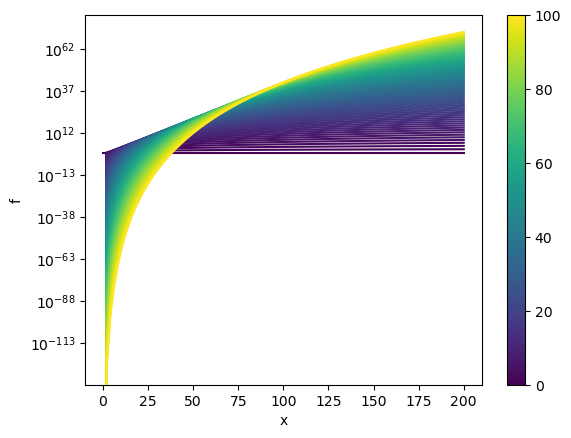

In [186]:
fig, ax = plt.subplots()
ax.set_yscale("log")
norm = plt.Normalize(min(us), max(us))
scm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
scm.set_array([])
sns.lineplot(data, x="x", y="f", hue="u", palette="viridis", ax=ax)    
ax.get_legend().remove()
fig.colorbar(scm)